In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db = mysql.connector.connect(host = 'localhost',
                              user = 'root',
                              password = '123456',
                              database = 'pizzahut')
cur = db.cursor()

# Retrieve The Total Number Of Orders Placed

In [2]:
query = """ select count(order_id) from orders """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Total Orders'])
print("Toatl Number Of Order Placed:", data[0][0])

Toatl Number Of Order Placed: 21350


# Find The Second Highest Price Of A Pizza

In [7]:
query = """ select max(pizzas.price) as sec_max from pizzas
where pizzas.price < (select max(pizzas.price) from pizzas)"""
cur.execute(query);
data = cur.fetchall();
print("Second Highest Pizza Price:",data[0][0])

Second Highest Pizza Price:  25.5


# Calculate the total revenue generated from pizza sales.

In [8]:
query = """ select round(sum(price * order_details.quantity),2) from pizzas
join order_details
on order_details.pizza_id = pizzas.pizza_id """
cur.execute(query)
data = cur.fetchall()
print("Total revenue generated from pizza sales:",data[0][0])

Total revenue generated from pizza sales: 817860.05


# Identify the highest-priced pizza.

In [9]:
query = """ select pizza_types.name, price from pizzas
join pizza_types
on pizzas.pizza_type_id = pizza_types.pizza_type_id
order by pizzas.price desc limit 1 """
cur.execute(query)
data = cur.fetchall()
print("highest-priced pizza is:",data[0][0])

highest-priced pizza is: The Greek Pizza


# Identify the lowest-priced pizza.

In [10]:
query = """ select pizza_types.name, price from pizzas
join pizza_types
on pizzas.pizza_type_id = pizza_types.pizza_type_id
order by pizzas.price asc limit 1 """
cur.execute(query)
data = cur.fetchall()
print("Lowest-priced pizza is:",data[0][0])

Lowest-priced pizza is: The Pepperoni Pizza


# Identify the most common pizza size ordered.

  pizza size  ordered num
0          L        18526
1          M        15385
2          S        14137
3         XL          544
4        XXL           28


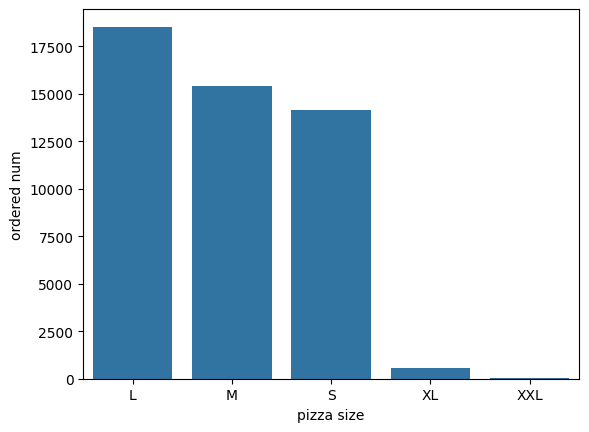

In [13]:
query = """ select size, count(quantity) as count from pizzas
join order_details
on order_details.pizza_id = pizzas.pizza_id
group by pizzas.size
order by count desc """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['pizza size', 'ordered num'])
print(df)
sns.barplot(data=df, x=df['pizza size'], y=df['ordered num'])
plt.show()

# List the top 10 most ordered pizza types along with their quantities.

                        pizza qty ord
0    The Classic Deluxe Pizza    2453
1  The Barbecue Chicken Pizza    2432
2          The Hawaiian Pizza    2422
3         The Pepperoni Pizza    2418
4      The Thai Chicken Pizza    2371


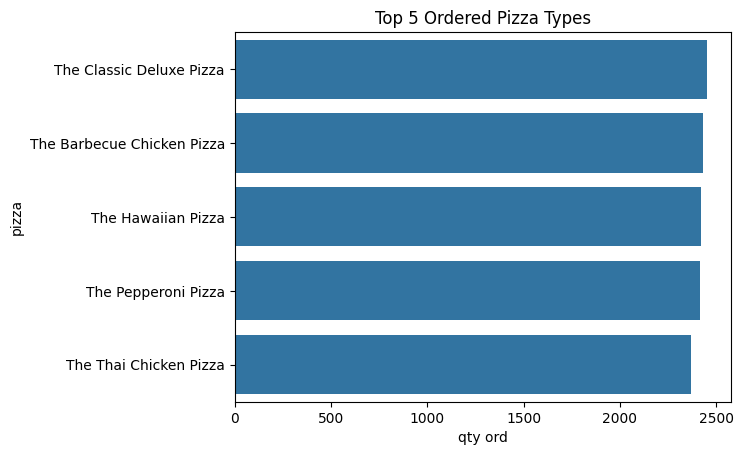

In [22]:
query = """ select pizza_types.name, sum(order_details.quantity) as 'ordered' from pizza_types
join pizzas
on pizza_types.pizza_type_id = pizzas.pizza_type_id
join order_details
on order_details.pizza_id = pizzas.pizza_id
group by pizza_types.name
order by ordered desc limit 5 """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['pizza', 'qty ord'])
print(df)
sns.barplot(data=df, x='qty ord', y='pizza', orient='h')
plt.title("Top 5 Ordered Pizza Types")
plt.show()

# Join the necessary tables to find the total quantity of each pizza category ordered.

In [20]:
query = """ select pizza_types.category, sum(order_details.quantity) from pizza_types
join pizzas
on pizza_types.pizza_type_id = pizzas.pizza_type_id
join order_details
on pizzas.pizza_id = order_details.pizza_id
group by pizza_types.category """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['category', 'quantity order'])
df

,category,quantity order
0,Classic,14888
1,Veggie,11649
2,Supreme,11987
3,Chicken,11050


# Determine the distribution of orders by hour of the day.

    order/hours  quantity order
0            11            1231
1            12            2520
2            13            2455
3            14            1472
4            15            1468
5            16            1920
6            17            2336
7            18            2399
8            19            2009
9            20            1642
10           21            1198
11           22             663
12           23              28
13           10               8
14            9               1


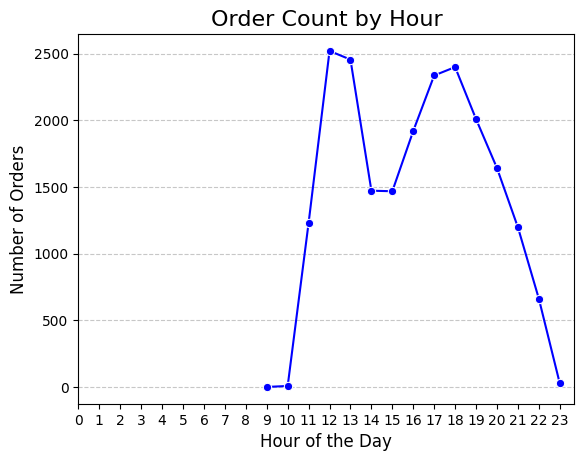

In [28]:
query = """ select hour(orders.time), count(orders.order_id) as order_count from orders
group by hour(orders.time) """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['order/hours', 'quantity order'])
print(df)
sns.lineplot(data=df, x='order/hours', y='quantity order', marker='o', color='b')
plt.title("Order Count by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Join relevant tables to find the category-wise distribution of pizzas.

In [29]:
query = """ select pizza_types.category, count(pizza_types.name), round(sum(pizzas.price),2) 
from pizza_types
join pizzas
group by pizza_types.category """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['pizza category', 'quantity pizza', 'Total Price'])
df

,pizza category,quantity pizza,Total Price
0,Veggie,864,14204.7
1,Supreme,864,14204.7
2,Classic,768,12626.4
3,Chicken,576,9469.8


# Group the orders by date and calculate the average number of pizzas ordered per day.

In [30]:
query = """ select round(avg(quantity),2) from 
        (select orders.date, count(order_details.quantity) as quantity from orders
        join order_details 
        on order_details.order_id = orders.order_id
        group by orders.date) as a """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['avg order/day'])
print("Average number of pizzas ordered per day:",data[0][0])

Average number of pizzas ordered per day: 135.81


# Determine the top 3 most ordered pizza types based on revenue.

In [16]:
query = """ select pizza_types.name, round(sum(pizzas.price * order_details.quantity),2) as revenue from pizza_types
join pizzas
on pizzas.pizza_type_id = pizza_types.pizza_type_id
join order_details
on order_details.pizza_id = pizzas.pizza_id
group by pizza_types.name
order by revenue desc limit 3 """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['pizza name', 'revenue'])
df

,pizza name,revenue
0,The Thai Chicken Pizza,43434.25
1,The Barbecue Chicken Pizza,42768.00
2,The California Chicken Pizza,41409.50


# Calculate the percentage contribution of each pizza type to total revenue.

In [14]:
query = """ select pizza_types.category, 
    round(
        sum(pizzas.price * order_details.quantity) / 
        (select sum(pizzas.price * order_details.quantity) 
         from pizzas
         join order_details
         on order_details.pizza_id = pizzas.pizza_id) * 100, 2
    ) as revenue
from 
    pizza_types
join pizzas
    on pizzas.pizza_type_id = pizza_types.pizza_type_id
join order_details
    on order_details.pizza_id = pizzas.pizza_id
group by 
    pizza_types.category
order by 
    revenue desc """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['pizza category', 'rev percentage'])
df

,pizza category,rev percentage
0,Classic,26.91
1,Supreme,25.46
2,Chicken,23.96
3,Veggie,23.68


# Analyze the cumulative revenue generated over time.

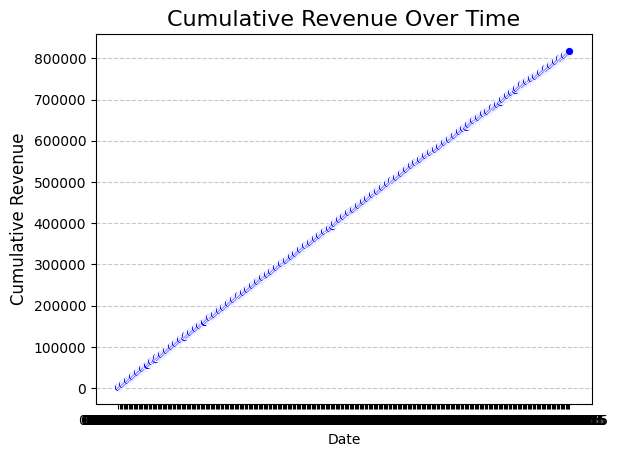

In [33]:
query = """ select dates, round(cumulative_revenue, 2) from
(select dates, sum(revenue) over(order by dates) as cumulative_revenue from 
(select orders.date as dates, sum(order_details.quantity * pizzas.price) as revenue from pizzas
join order_details
on order_details.pizza_id = pizzas.pizza_id
join orders
on orders.order_id = order_details.order_id
group by orders.date ) as sales
) as  cumulative_sales """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Date', 'Cummulative Revenue'])
df.head(10)
sns.lineplot(data=df, x='Date', y='Cummulative Revenue', marker='o', color='b')
plt.title("Cumulative Revenue Over Time", fontsize=16)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

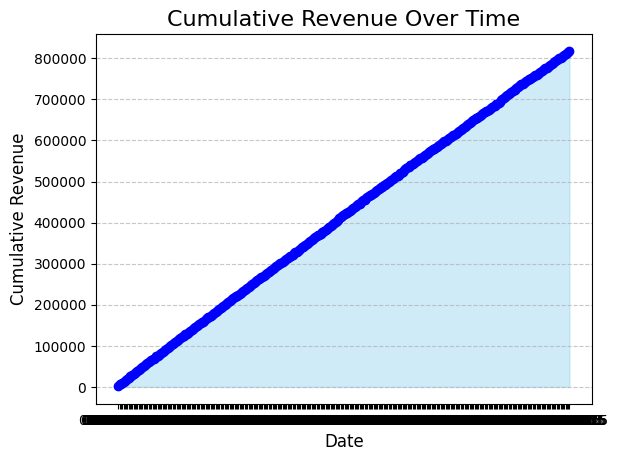

In [35]:
query = """ select dates, round(cumulative_revenue, 2) from
(select dates, sum(revenue) over(order by dates) as cumulative_revenue from 
(select orders.date as dates, sum(order_details.quantity * pizzas.price) as revenue from pizzas
join order_details
on order_details.pizza_id = pizzas.pizza_id
join orders
on orders.order_id = order_details.order_id
group by orders.date ) as sales
) as  cumulative_sales """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Date', 'Cummulative Revenue'])
plt.fill_between(df['Date'], df['Cummulative Revenue'], color='skyblue', alpha=0.4)
plt.plot(df['Date'], df['Cummulative Revenue'], marker='o', color='b')
plt.title("Cumulative Revenue Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Determine the top 3 most ordered pizza types based on revenue for each pizza category.

    Rank                         Pizza   Revenue
0      1        The Thai Chicken Pizza  43434.25
1      2    The Barbecue Chicken Pizza  42768.00
2      3  The California Chicken Pizza  41409.50
3      1      The Classic Deluxe Pizza  38180.50
4      2            The Hawaiian Pizza  32273.25
5      3           The Pepperoni Pizza  30161.75
6      1       The Spicy Italian Pizza  34831.25
7      2     The Italian Supreme Pizza  33476.75
8      3            The Sicilian Pizza  30940.50
9      1         The Four Cheese Pizza  32265.70
10     2            The Mexicana Pizza  26780.75
11     3         The Five Cheese Pizza  26066.50


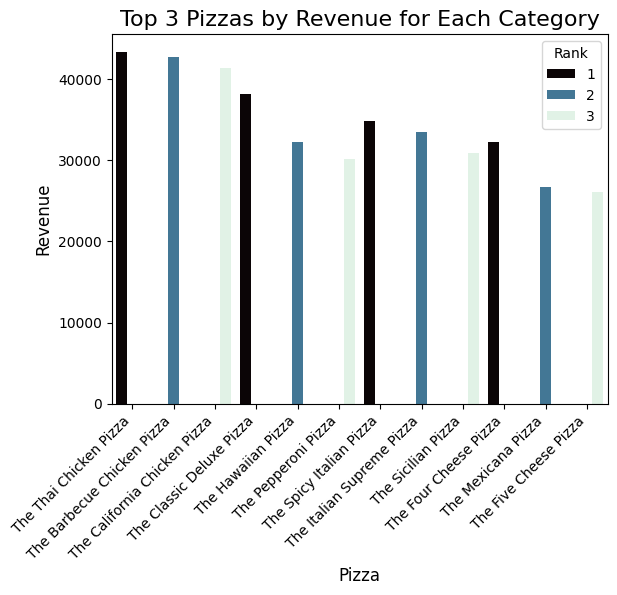

In [45]:
query = """ select rn, pizza, revenue  from
(select categories, pizza, revenue, rank() over(partition by categories order by revenue  desc) 
as rn from
(select pizza_types.category as categories, pizza_types.name as pizza,
sum(order_details.quantity * pizzas.price) as revenue from
order_details join pizzas
on order_details.pizza_id = pizzas.pizza_id
join pizza_types
on pizza_types.pizza_type_id = pizzas.pizza_type_id
group by categories, pizza) as sales
) as top_sales
where rn<=3 """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Rank', 'Pizza', 'Revenue'])
print(df)
df.columns = ['Rank', 'Pizza', 'Revenue']  # Assign proper column name
sns.barplot(data=df, x='Pizza', y='Revenue', hue='Rank', dodge=True, palette='mako')
plt.title("Top 3 Pizzas by Revenue for Each Category", fontsize=16)
plt.xlabel("Pizza", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Rank", loc='upper right')
plt.show()

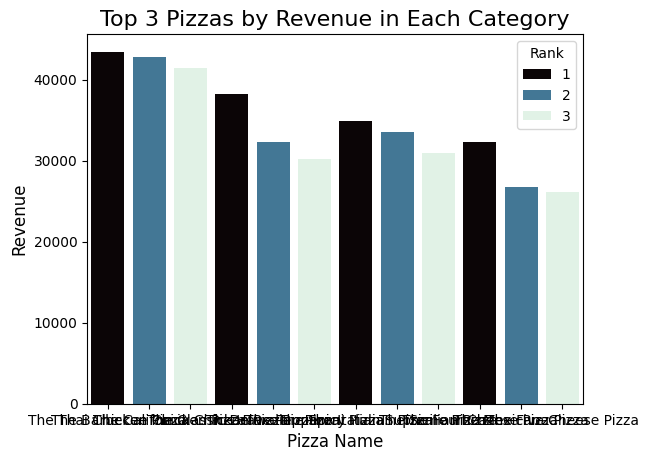

In [46]:
query = """ 
    select rn, pizza, revenue from
    (select categories, pizza, revenue, rank() over(partition by categories order by revenue desc) as rn from
    (select pizza_types.category as categories, pizza_types.name as pizza, 
        sum(order_details.quantity * pizzas.price) as revenue 
    from order_details 
    join pizzas on order_details.pizza_id = pizzas.pizza_id
    join pizza_types on pizza_types.pizza_type_id = pizzas.pizza_type_id
    group by categories, pizza) as sales) as top_sales
    where rn<=3
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Rank', 'Pizza Name', 'Revenue'])
sns.barplot(data=df, x='Pizza Name', y='Revenue', hue='Rank', palette='mako')
plt.title("Top 3 Pizzas by Revenue in Each Category", fontsize=16)
plt.xlabel("Pizza Name", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.savefig('top_pizzas_by_revenue.png', facecolor='black')
plt.show()
